# Part II - Presentation
## by Damola Adedoyin

## Investigation Overview

The focus of the exploration was to examine the factors that contributes the most to the stability (and variation)
in ride duration and how these factors affect each other in relation to the target variable (ride duration). 
Of all the other features of interest, the features focused on (seeing they had the most obvious effects) 
include the rider start-hour, members type, members gender and members age. The relationship between this
individual features or a combination of then will be presented in the final presentation. 


## Dataset Overview

The [Ford GoBike Dataset](https://github.com/BetaNYC/Bike-Share-Data-Best-Practices/wiki/Bike-Share-Data-Systems) 
originally contained 183412 rows of data and 16 columns. 
Each row represents a ride made in a bike-sharing system around the San Francisco Bay area 
in the United State, for the month of February 2019. The `ride duration (in minutes)` shows how long 
it takes a rider to go from one station (`start station`) to another (`end station`).

Some cleaning were done to remove rows with missing data and some addition columns were extracted 
from the existing ones to create features to aid better data exploration and analysis. At the end of the the wrangling process, the final dataset that went on to the exploration and visualization 
stages included 174952 rows and 16 columns.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
bike_cut = pd.read_csv('bike_cut.csv')
bike_cut.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,start_hour,end_hour,start_weekday,start_day,member_age,duration_min
0,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,Male,Yes,23,0,Thursday,28,45,26.4
1,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,Male,No,23,0,Thursday,28,60,29.9
2,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,312,San Jose Diridon Station,3803,Subscriber,Female,No,23,0,Thursday,28,36,19.1
3,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,127,Valencia St at 21st St,6329,Subscriber,Male,No,23,0,Thursday,28,30,26.9
4,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,127,Valencia St at 21st St,6548,Subscriber,Other,No,23,0,Thursday,28,31,26.2


## Distribution of the main feature of interest (Ride Duration)

The wide range ride duration data was plotted on a logarithmic scale and it distribution looks strickly unimodal.The modal duration appears to be around rides lasting for about 6mins to about 7 mins, and the median duration lies within this range aswell.  The data appears to be significantly right-skewed. 

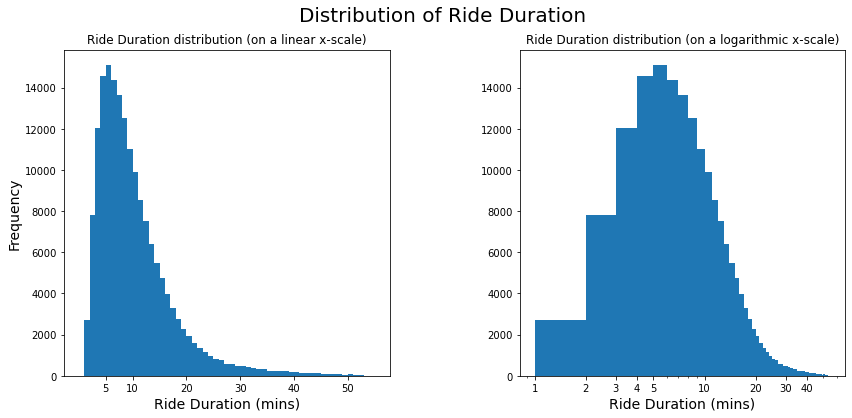

In [4]:
plt.figure(figsize = (14,6))
plt.subplots_adjust(wspace=0.4)

base_color = sb.color_palette()[0]
plt.suptitle("Distribution of Ride Duration", fontsize = 20)

plt.subplot(121)
plt.hist(data = bike_cut, x  = 'duration_min', bins = range(0,56,1))
plt.xticks([5,10,20,30,40,50], [5,10,20,30,40,50])
plt.title('Ride Duration distribution (on a linear x-scale)')
plt.xlabel('Ride Duration (mins)', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14);

plt.subplot(122)
plt.hist(data = bike_cut, x  = 'duration_min', bins = range(0,56,1))
plt.xscale('log')
plt.xticks([1,2,3,4,5,10,20,30,40], [1,2,3,4,5,10,20,30,40])
plt.title('Ride Duration distribution (on a logarithmic x-scale)')
plt.xlabel('Ride Duration (mins)', fontsize = 14);

## Ride Start-Hours and End-Hours Distribution
The plot below shows a bimodal distribution of the hours of the day that a rides started (in blue) and ended (in orange). Understandably, the two peak periods are in the morning between the hours of 8am to 9am as members commute to work, and then in the evening, after work, between the hours of 5pm to 6pm. There is a close similarity between both the start and end hours as the plot appeared to overlap at several points for an hour (1hr) interval. This must be due to the fact that 3/4 of the entire distribution is below 14mins in duration. A much smaller interval of about 0.125hr (7.5mins) shows the distribution of both features separately below.


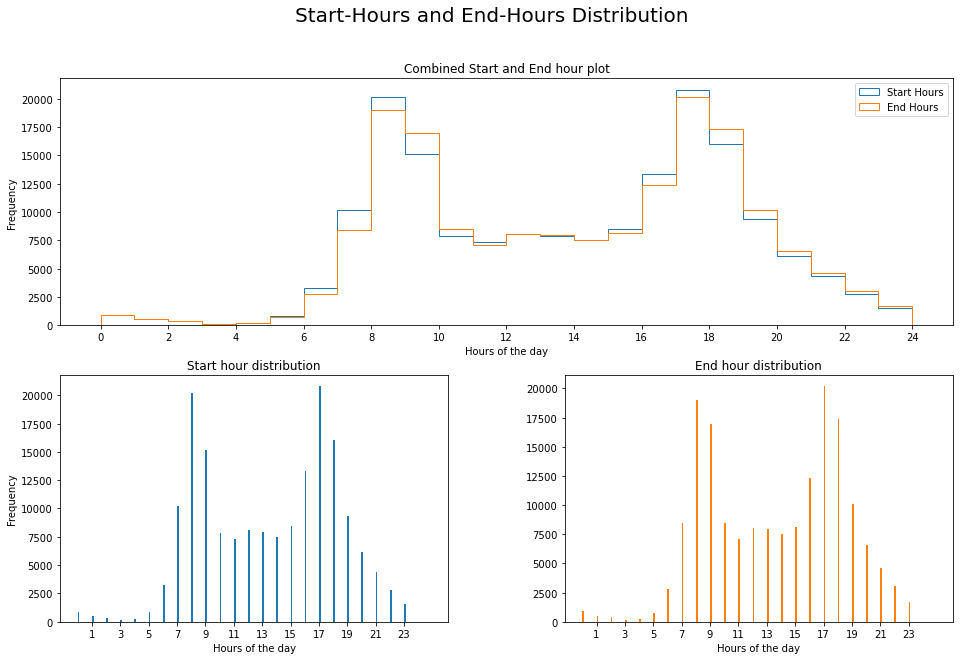

In [5]:
plt.figure(figsize = (16,10))
plt.suptitle("Start-Hours and End-Hours Distribution", fontsize = 20)
plt.subplots_adjust(wspace=0.3)

plt.subplot(2,2,(1,2))
plt.hist(bike_cut['start_hour'], bins=np.arange(0,25,1), histtype = 'step', label='Start Hours')
plt.xticks(range(0,25,2))
plt.xlabel('Hours of the day')

plt.hist(bike_cut['end_hour'], bins=np.arange(0,25,1), histtype = 'step', label='End Hours')
plt.xticks(range(0,25,2))
plt.xlabel('Hours of the day')
plt.ylabel('Frequency');

plt.legend()
plt.title('Combined Start and End hour plot');



plt.subplot(223, title = 'Start hour distribution', xticks = range(1,25,2), xlabel = 'Hours of the day')
plt.hist(bike_cut['start_hour'], bins=np.arange(0,25,0.125))
plt.ylabel('Frequency');

plt.subplot(224,   title = 'End hour distribution', xticks = range(1,25,2), xlabel = 'Hours of the day')
plt.hist(bike_cut['end_hour'], bins=np.arange(0,25,0.125), color=sb.color_palette()[1]);

##  Distribution of Members' Ages

The age distribution shows a right skew and was hence plotted on a logarithmic scale. It appears to be trimodal (3 distinct high frequency age intervals) with frequency skikes at about 27, 31, and 38 years. It is important to note that ages above 70yrs exist but have been cut off as records for such age group (71+ years) are negligible.

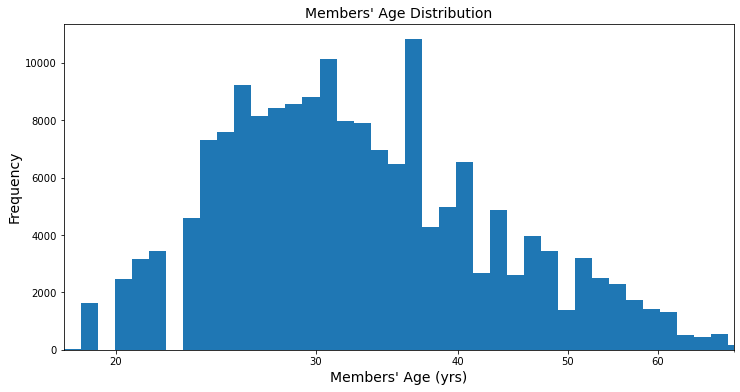

In [6]:
plt.figure(figsize = (12,6))

x_ticks = [ 20, 30, 40, 50, 60,80,100]
min_ = np.log10(bike_cut['member_age']).min()
max_ = np.log10(bike_cut['member_age']).max()
bin_size = 10**np.arange(min_, max_+0.015, 0.015)
plt.hist(bike_cut['member_age'], bins  = bin_size)
plt.xscale('log')
plt.xticks(x_ticks, x_ticks)
plt.xlim(18, 70)
plt.title('Members\' Age Distribution', fontsize = 14)
plt.xlabel('Members\' Age (yrs)', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14);


##   Relationship between Ride Duration and other features of interest

2 other factors that seem to influence the ride duration to a certain degree are the members' gender and membership type. It should be noted that there is an imbalance in the dataset where gender ratio is approximately 30:10:1 (male : female : other), and membership type is approximately 10:1 (subscribers : customers), hence the insight from these two features may be as a result of the imbalance.

Although largely insignificant, the member's age also seem so have some effects on the ride duration.

> #### A. *Members Gender's* relationship with ride duration
On the left-hand-side, the pointplot (in orange) shows that on average, male subscribers typically have a lesser ride duration than female and other gender subscribers. The boxplot (in blue) show the duration quartiles for each of the gender categories.

> #### B. *Membership type's* relationship with ride duration
On the left-right-side, the barplot (top) shows the customers (about 10% of members) have a higher mean ride duration than the subscribers. The boxplot below the barplot also show similar insight. The subscribers tipically have a lower median, 1st and 3rd quartile ride duration compared to the customers.


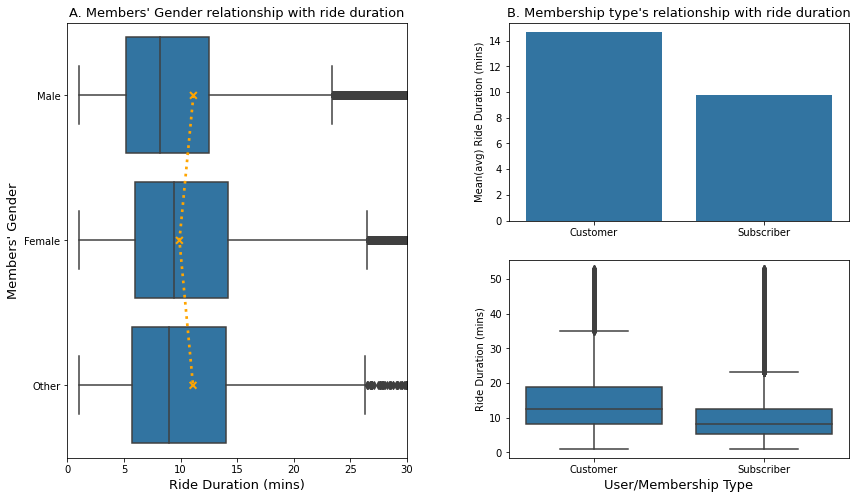

In [7]:
plt.figure(figsize = (14,8))

gender_duration = bike_cut.groupby('member_gender')['duration_min'].agg(['count', 'mean'])
hourly_duration=bike_cut.groupby(['start_hour', 'member_gender']).agg({'duration_min':[np.mean, np.median, np.min, np.max]})
gender_hour_duration = hourly_duration['duration_min'][['mean', 'median']].reset_index()

plt.subplot(2,2,(1,3))
plt.subplots_adjust(wspace=0.3)

sb.pointplot(x = gender_duration['mean'], y = gender_duration.index, linestyles=':', color = 'orange', markers='x')
sb.boxplot(data = bike_cut, y = 'member_gender', x = 'duration_min', color = base_color)
plt.xlabel('Ride Duration (mins)', fontsize = 13)
plt.ylabel('Members\' Gender', fontsize = 13)
plt.title('A. Members\' Gender relationship with ride duration', fontsize = 13)
plt.xlim(0,30)


user_duration = bike_cut.groupby('user_type')['duration_min'].agg(['count', 'mean'])

plt.subplot(222)
sb.barplot(y = user_duration['mean'], x = user_duration.index, color=base_color)
plt.ylabel('Mean(avg) Ride Duration (mins)')
plt.xlabel('')
plt.title('B. Membership type\'s relationship with ride duration', fontsize = 13)
;

plt.subplot(224)
sb.boxplot(data=bike_cut, x = 'user_type', y = 'duration_min',order = ['Customer','Subscriber'], color = base_color)
plt.xlabel('User/Membership Type', fontsize = 13)
plt.ylabel('Ride Duration (mins)');

##   Relationship between ride start-hour and ride duration for different membership types

From the lineplot below, after a steady rise from 6am to 8am in the morning, the subscribers look to show a more steady mean ride duration between the hours of 8am and 8pm. The customers on the other hand, show an upward trend in the mean ride duration right from a start-hour of 6am, peaks at about 1pm start-hour and then a steady decline after that. The reason for this difference in trend (between both member types) is unclear for the provided dataset, and no inference or conclusion can be made as to the cause of this.


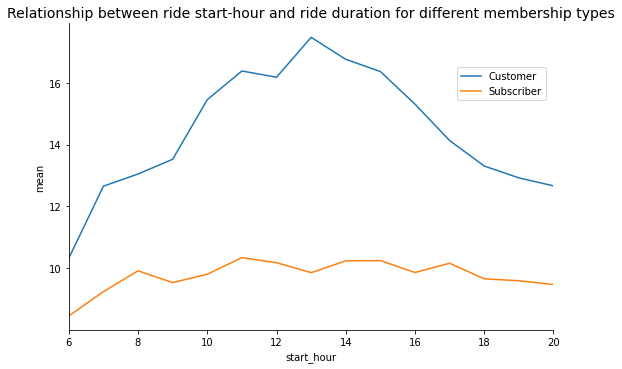

In [9]:
hourly_duration=bike_cut.groupby(['start_hour', 'user_type']).agg({'duration_min':[np.mean, np.median, np.min, np.max]})
user_hour_duration = hourly_duration['duration_min'][['mean', 'median']].reset_index()

g = sb.FacetGrid(data = user_hour_duration, hue = 'user_type', height =5, aspect=1.5)
g.map(plt.plot, 'start_hour', 'mean')
plt.title('Relationship between ride start-hour and ride duration for different membership types', fontsize = 14)
g.set(xlim = (6,20))
plt.legend(loc =(0.8,0.75));


##   Relationship between members' age and ride duration for each member type grouped by members' gender

From the set of plots below, the comparison between the members' ages and ride duration for each member type was made. This comparison has further been grouped for each gender category ('Female', 'Male', 'Other'). The result shows that the male members (and particularlly the male subscribers) shows the most steady  ride duration (around 9 to about 11 mins) of all 3 gender categories. The female subscribers between the ages of 20 and 50 also show a steady ride duration around 10 to 12 mins. Overall, for both male and female members, the subscriber (orange label) looks to have a much lower and steadier mean ride duration compared to the customers except in very few cases. Unsurprisingly, the other gender types don't look to show any insightful pattern or trend for either subscribers or customers. This is most likely due to the  relatively low sample size of these gender category in the dataset.


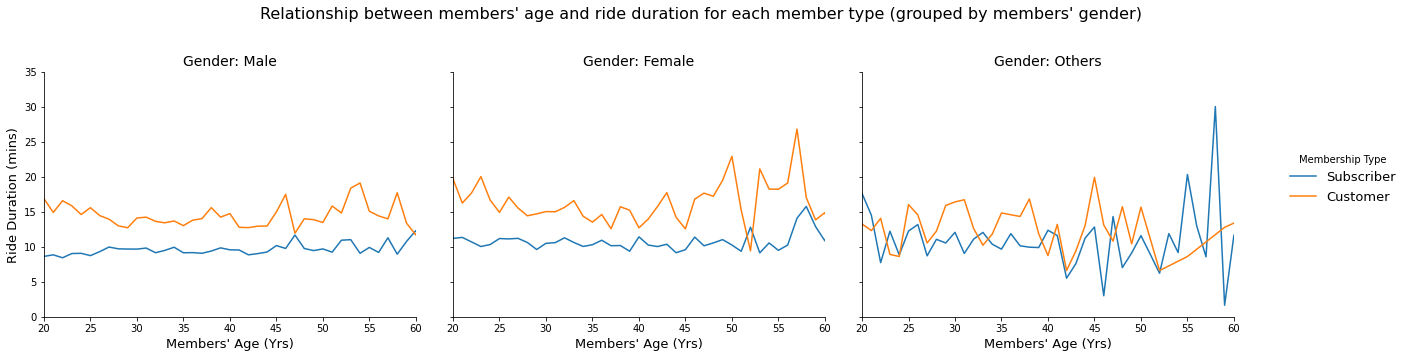

In [10]:
g=sb.FacetGrid(data = bike_cut, hue='user_type', col = 'member_gender',  
               height =5, aspect=1.2, margin_titles = True, legend_out=True)
g.map(sb.lineplot, 'member_age', 'duration_min', ci = None)
g.add_legend(title = 'Membership Type', fontsize =13)
g.fig.subplots_adjust(top=0.8, wspace = 0.1)
g.fig.suptitle('Relationship between members\' age and ride duration for each member type (grouped by members\' gender)', 
               fontsize = 16)
axes = g.axes.flatten()
axes[0].set_title("Gender: Male", fontsize =14)
axes[1].set_title("Gender: Female", fontsize =14)
axes[2].set_title("Gender: Others", fontsize =14)
g.set_xlabels('Members\' Age (Yrs)', fontsize =13)
g.set_ylabels('Ride Duration (mins)', fontsize =13)

plt.xlim((20,60))
plt.ylim((0,35));


In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt